# Birth Rate Per Capita Mini-Project

This mini-project aims to assess whether Birth Rate per Capita drops significantly around the world when countries develop and become richer, and its impact on the world population growth.

Dataset used:      "World Development Indicators" from Kaggle (originally from the World Bank)

## Import Packages

Numpy
Pandas
Matplotlib
Random
Folium

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import random
import folium

## Loading the dataset

In [2]:
dataset = pd.read_csv('./world-development-indicators/Indicators.csv')
dataset.shape

(5656458, 6)

## Exploring the dataset

In [3]:
dataset.head(10)

,CountryName,CountryCode,IndicatorName,IndicatorCode,Year,Value
0,Arab World,ARB,"Adolescent fertility rate (births per 1,000 wo...",SP.ADO.TFRT,1960,1.335609e+02
1,Arab World,ARB,Age dependency ratio (% of working-age populat...,SP.POP.DPND,1960,8.779760e+01
2,Arab World,ARB,"Age dependency ratio, old (% of working-age po...",SP.POP.DPND.OL,1960,6.634579e+00
3,Arab World,ARB,"Age dependency ratio, young (% of working-age ...",SP.POP.DPND.YG,1960,8.102333e+01
4,Arab World,ARB,Arms exports (SIPRI trend indicator values),MS.MIL.XPRT.KD,1960,3.000000e+06
5,Arab World,ARB,Arms imports (SIPRI trend indicator values),MS.MIL.MPRT.KD,1960,5.380000e+08
6,Arab World,ARB,"Birth rate, crude (per 1,000 people)",SP.DYN.CBRT.IN,1960,4.769789e+01
7,Arab World,ARB,CO2 emissions (kt),EN.ATM.CO2E.KT,1960,5.956399e+04
8,Arab World,ARB,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,1960,6.439635e-01
9,Arab World,ARB,CO2 emissions from gaseous fuel consumption (%...,EN.ATM.CO2E.GF.ZS,1960,5.041292e+00


### Subset of records with "Birth rate" indicator

In [4]:
filter_birth = dataset["IndicatorName"].str.contains("Birth rate")
#filter1.head()
subset_birth = dataset[filter_birth]
subset_birth.head(10)

,CountryName,CountryCode,IndicatorName,IndicatorCode,Year,Value
6,Arab World,ARB,"Birth rate, crude (per 1,000 people)",SP.DYN.CBRT.IN,1960,47.697888
84,Caribbean small states,CSS,"Birth rate, crude (per 1,000 people)",SP.DYN.CBRT.IN,1960,40.017001
164,Central Europe and the Baltics,CEB,"Birth rate, crude (per 1,000 people)",SP.DYN.CBRT.IN,1960,19.117435
236,East Asia & Pacific (all income levels),EAS,"Birth rate, crude (per 1,000 people)",SP.DYN.CBRT.IN,1960,26.362350
359,East Asia & Pacific (developing only),EAP,"Birth rate, crude (per 1,000 people)",SP.DYN.CBRT.IN,1960,26.635950
480,Euro area,EMU,"Birth rate, crude (per 1,000 people)",SP.DYN.CBRT.IN,1960,18.838713
599,Europe & Central Asia (all income levels),ECS,"Birth rate, crude (per 1,000 people)",SP.DYN.CBRT.IN,1960,22.141599
708,Europe & Central Asia (developing only),ECA,"Birth rate, crude (per 1,000 people)",SP.DYN.CBRT.IN,1960,30.390165
797,European Union,EUU,"Birth rate, crude (per 1,000 people)",SP.DYN.CBRT.IN,1960,18.579592
912,Fragile and conflict affected situations,FCS,"Birth rate, crude (per 1,000 people)",SP.DYN.CBRT.IN,1960,46.458639


### Subset of records with GDP per Capita -constant 2005 US$ - Indicator

In [5]:
filter_GDP = dataset["IndicatorCode"] == "NY.GDP.PCAP.KD"
#filter1.head()
subset_GDP = dataset[filter_GDP]
subset_GDP.head(10)

,CountryName,CountryCode,IndicatorName,IndicatorCode,Year,Value
263,East Asia & Pacific (all income levels),EAS,GDP per capita (constant 2005 US$),NY.GDP.PCAP.KD,1960,982.026842
376,East Asia & Pacific (developing only),EAP,GDP per capita (constant 2005 US$),NY.GDP.PCAP.KD,1960,168.600612
517,Euro area,EMU,GDP per capita (constant 2005 US$),NY.GDP.PCAP.KD,1960,9388.717505
623,Europe & Central Asia (all income levels),ECS,GDP per capita (constant 2005 US$),NY.GDP.PCAP.KD,1960,6547.964873
835,European Union,EUU,GDP per capita (constant 2005 US$),NY.GDP.PCAP.KD,1960,8997.466960
1003,Heavily indebted poor countries (HIPC),HPC,GDP per capita (constant 2005 US$),NY.GDP.PCAP.KD,1960,424.892109
1126,High income,HIC,GDP per capita (constant 2005 US$),NY.GDP.PCAP.KD,1960,9080.743279
1326,High income: OECD,OEC,GDP per capita (constant 2005 US$),NY.GDP.PCAP.KD,1960,10647.053893
1436,Latin America & Caribbean (all income levels),LCN,GDP per capita (constant 2005 US$),NY.GDP.PCAP.KD,1960,2316.355110
1566,Latin America & Caribbean (developing only),LAC,GDP per capita (constant 2005 US$),NY.GDP.PCAP.KD,1960,1924.846754


In [6]:
filter_pop = dataset["IndicatorName"] == "Population, total"
#filter1.head()
subset_pop = dataset[filter_pop]
subset_pop.head(10)

,CountryName,CountryCode,IndicatorName,IndicatorCode,Year,Value
73,Arab World,ARB,"Population, total",SP.POP.TOTL,1960,9.249590e+07
150,Caribbean small states,CSS,"Population, total",SP.POP.TOTL,1960,4.190810e+06
221,Central Europe and the Baltics,CEB,"Population, total",SP.POP.TOTL,1960,9.140158e+07
341,East Asia & Pacific (all income levels),EAS,"Population, total",SP.POP.TOTL,1960,1.042475e+09
462,East Asia & Pacific (developing only),EAP,"Population, total",SP.POP.TOTL,1960,8.964930e+08
581,Euro area,EMU,"Population, total",SP.POP.TOTL,1960,2.653965e+08
693,Europe & Central Asia (all income levels),ECS,"Population, total",SP.POP.TOTL,1960,6.674890e+08
783,Europe & Central Asia (developing only),ECA,"Population, total",SP.POP.TOTL,1960,1.553174e+08
895,European Union,EUU,"Population, total",SP.POP.TOTL,1960,4.094985e+08
975,Fragile and conflict affected situations,FCS,"Population, total",SP.POP.TOTL,1960,1.203546e+08


### Records with GDP and Birth Rate indicators in the same year

In [7]:
subset_GDP_birth = pd.merge(subset_GDP, subset_birth, on=['CountryName','CountryCode','Year'], how='inner')
subset_GDP_birth.head(10)

,CountryName,CountryCode,IndicatorName_x,IndicatorCode_x,Year,Value_x,IndicatorName_y,IndicatorCode_y,Value_y
0,East Asia & Pacific (all income levels),EAS,GDP per capita (constant 2005 US$),NY.GDP.PCAP.KD,1960,982.026842,"Birth rate, crude (per 1,000 people)",SP.DYN.CBRT.IN,26.362350
1,East Asia & Pacific (developing only),EAP,GDP per capita (constant 2005 US$),NY.GDP.PCAP.KD,1960,168.600612,"Birth rate, crude (per 1,000 people)",SP.DYN.CBRT.IN,26.635950
2,Euro area,EMU,GDP per capita (constant 2005 US$),NY.GDP.PCAP.KD,1960,9388.717505,"Birth rate, crude (per 1,000 people)",SP.DYN.CBRT.IN,18.838713
3,Europe & Central Asia (all income levels),ECS,GDP per capita (constant 2005 US$),NY.GDP.PCAP.KD,1960,6547.964873,"Birth rate, crude (per 1,000 people)",SP.DYN.CBRT.IN,22.141599
4,European Union,EUU,GDP per capita (constant 2005 US$),NY.GDP.PCAP.KD,1960,8997.466960,"Birth rate, crude (per 1,000 people)",SP.DYN.CBRT.IN,18.579592
5,Heavily indebted poor countries (HIPC),HPC,GDP per capita (constant 2005 US$),NY.GDP.PCAP.KD,1960,424.892109,"Birth rate, crude (per 1,000 people)",SP.DYN.CBRT.IN,48.180658
6,High income,HIC,GDP per capita (constant 2005 US$),NY.GDP.PCAP.KD,1960,9080.743279,"Birth rate, crude (per 1,000 people)",SP.DYN.CBRT.IN,22.187171
7,High income: OECD,OEC,GDP per capita (constant 2005 US$),NY.GDP.PCAP.KD,1960,10647.053893,"Birth rate, crude (per 1,000 people)",SP.DYN.CBRT.IN,21.039056
8,Latin America & Caribbean (all income levels),LCN,GDP per capita (constant 2005 US$),NY.GDP.PCAP.KD,1960,2316.355110,"Birth rate, crude (per 1,000 people)",SP.DYN.CBRT.IN,41.569038
9,Latin America & Caribbean (developing only),LAC,GDP per capita (constant 2005 US$),NY.GDP.PCAP.KD,1960,1924.846754,"Birth rate, crude (per 1,000 people)",SP.DYN.CBRT.IN,44.105637


### Records with GDP, Birth Rate, and Population indicators i the same year

In [8]:
subset_GDP_birth_pop = pd.merge(subset_GDP_birth, subset_pop, on=['CountryName','CountryCode','Year'], how='inner')
subset_GDP_birth_pop.head(10)

,CountryName,CountryCode,IndicatorName_x,IndicatorCode_x,Year,Value_x,IndicatorName_y,IndicatorCode_y,Value_y,IndicatorName,IndicatorCode,Value
0,East Asia & Pacific (all income levels),EAS,GDP per capita (constant 2005 US$),NY.GDP.PCAP.KD,1960,982.026842,"Birth rate, crude (per 1,000 people)",SP.DYN.CBRT.IN,26.362350,"Population, total",SP.POP.TOTL,1.042475e+09
1,East Asia & Pacific (developing only),EAP,GDP per capita (constant 2005 US$),NY.GDP.PCAP.KD,1960,168.600612,"Birth rate, crude (per 1,000 people)",SP.DYN.CBRT.IN,26.635950,"Population, total",SP.POP.TOTL,8.964930e+08
2,Euro area,EMU,GDP per capita (constant 2005 US$),NY.GDP.PCAP.KD,1960,9388.717505,"Birth rate, crude (per 1,000 people)",SP.DYN.CBRT.IN,18.838713,"Population, total",SP.POP.TOTL,2.653965e+08
3,Europe & Central Asia (all income levels),ECS,GDP per capita (constant 2005 US$),NY.GDP.PCAP.KD,1960,6547.964873,"Birth rate, crude (per 1,000 people)",SP.DYN.CBRT.IN,22.141599,"Population, total",SP.POP.TOTL,6.674890e+08
4,European Union,EUU,GDP per capita (constant 2005 US$),NY.GDP.PCAP.KD,1960,8997.466960,"Birth rate, crude (per 1,000 people)",SP.DYN.CBRT.IN,18.579592,"Population, total",SP.POP.TOTL,4.094985e+08
5,Heavily indebted poor countries (HIPC),HPC,GDP per capita (constant 2005 US$),NY.GDP.PCAP.KD,1960,424.892109,"Birth rate, crude (per 1,000 people)",SP.DYN.CBRT.IN,48.180658,"Population, total",SP.POP.TOTL,1.624912e+08
6,High income,HIC,GDP per capita (constant 2005 US$),NY.GDP.PCAP.KD,1960,9080.743279,"Birth rate, crude (per 1,000 people)",SP.DYN.CBRT.IN,22.187171,"Population, total",SP.POP.TOTL,9.075975e+08
7,High income: OECD,OEC,GDP per capita (constant 2005 US$),NY.GDP.PCAP.KD,1960,10647.053893,"Birth rate, crude (per 1,000 people)",SP.DYN.CBRT.IN,21.039056,"Population, total",SP.POP.TOTL,7.209208e+08
8,Latin America & Caribbean (all income levels),LCN,GDP per capita (constant 2005 US$),NY.GDP.PCAP.KD,1960,2316.355110,"Birth rate, crude (per 1,000 people)",SP.DYN.CBRT.IN,41.569038,"Population, total",SP.POP.TOTL,2.205642e+08
9,Latin America & Caribbean (developing only),LAC,GDP per capita (constant 2005 US$),NY.GDP.PCAP.KD,1960,1924.846754,"Birth rate, crude (per 1,000 people)",SP.DYN.CBRT.IN,44.105637,"Population, total",SP.POP.TOTL,1.776822e+08


### List of countries with GDP, Birth rate and Population

In [9]:
countries = subset_GDP_birth_pop["CountryName"].unique().tolist()
len(countries)

229

In [10]:
len(subset_GDP_birth_pop)

9507

In [11]:
len(subset_GDP_birth_pop["CountryName"])

9507

In [12]:
"World" in countries

True

In [32]:
filter_world = (subset_GDP_birth_pop["CountryName"] == "World")
subset_world = subset_GDP_birth_pop[filter_world]
subset_world.head(10)

,CountryName,CountryCode,IndicatorName_x,IndicatorCode_x,Year,Value_x,IndicatorName_y,IndicatorCode_y,Value_y,IndicatorName,IndicatorCode,Value
19,World,WLD,GDP per capita (constant 2005 US$),NY.GDP.PCAP.KD,1960,3066.332850,"Birth rate, crude (per 1,000 people)",SP.DYN.CBRT.IN,31.852130,"Population, total",SP.POP.TOTL,3.034971e+09
129,World,WLD,GDP per capita (constant 2005 US$),NY.GDP.PCAP.KD,1961,3155.181854,"Birth rate, crude (per 1,000 people)",SP.DYN.CBRT.IN,31.130249,"Population, total",SP.POP.TOTL,3.076039e+09
239,World,WLD,GDP per capita (constant 2005 US$),NY.GDP.PCAP.KD,1962,3274.166163,"Birth rate, crude (per 1,000 people)",SP.DYN.CBRT.IN,34.973515,"Population, total",SP.POP.TOTL,3.128992e+09
350,World,WLD,GDP per capita (constant 2005 US$),NY.GDP.PCAP.KD,1963,3374.815593,"Birth rate, crude (per 1,000 people)",SP.DYN.CBRT.IN,36.137676,"Population, total",SP.POP.TOTL,3.193888e+09
460,World,WLD,GDP per capita (constant 2005 US$),NY.GDP.PCAP.KD,1964,3525.411667,"Birth rate, crude (per 1,000 people)",SP.DYN.CBRT.IN,35.020803,"Population, total",SP.POP.TOTL,3.259303e+09
571,World,WLD,GDP per capita (constant 2005 US$),NY.GDP.PCAP.KD,1965,3645.973749,"Birth rate, crude (per 1,000 people)",SP.DYN.CBRT.IN,34.396072,"Population, total",SP.POP.TOTL,3.326000e+09
688,World,WLD,GDP per capita (constant 2005 US$),NY.GDP.PCAP.KD,1966,3779.391539,"Birth rate, crude (per 1,000 people)",SP.DYN.CBRT.IN,33.356690,"Population, total",SP.POP.TOTL,3.395797e+09
809,World,WLD,GDP per capita (constant 2005 US$),NY.GDP.PCAP.KD,1967,3866.421668,"Birth rate, crude (per 1,000 people)",SP.DYN.CBRT.IN,33.082671,"Population, total",SP.POP.TOTL,3.465205e+09
931,World,WLD,GDP per capita (constant 2005 US$),NY.GDP.PCAP.KD,1968,4019.730450,"Birth rate, crude (per 1,000 people)",SP.DYN.CBRT.IN,33.224742,"Population, total",SP.POP.TOTL,3.535391e+09
1055,World,WLD,GDP per capita (constant 2005 US$),NY.GDP.PCAP.KD,1969,4167.938659,"Birth rate, crude (per 1,000 people)",SP.DYN.CBRT.IN,32.713414,"Population, total",SP.POP.TOTL,3.609761e+09


### Histogram  of World Population (in billions)

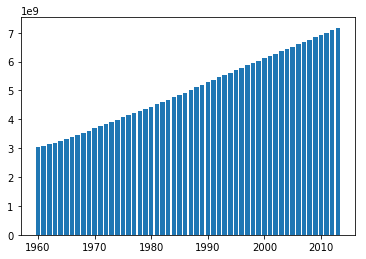

In [33]:
years = subset_world["Year"].values
population = subset_world["Value"].values
plt.bar(years,population)
plt.show()
#plt.plot(subset_world['Year'].values, subset_world['Value'].values)

### Population growth in the world and the most populous countries

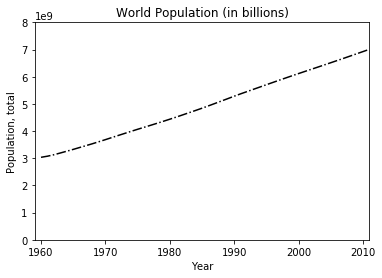

In [57]:
# switch to a line plotin
plt.plot(subset_world['Year'].values, subset_world['Value'].values, 'k-.')
#plt.plot(subset_world['Year'].values,subset_China['Value'].values)
#plt.plot(subset_world['Year'].values,subset_india['Value'].values)
# Label the axes
plt.xlabel('Year')
plt.ylabel(subset_world['IndicatorName'].iloc[0])

#label the figure
plt.title('World Population (in billions)')

# to make more honest, start they y axis at 0
#plt.axis([1959, 2011,0,8000000000])
plt.axis([1959, 2011,0,8000000000])
plt.show()

In [95]:
subset_world['Value'].describe()

count    5.400000e+01
mean     5.016983e+09
std      1.260320e+09
min      3.034971e+09
25%      3.933682e+09
50%      4.971076e+09
75%      6.095853e+09
max      7.174521e+09
Name: Value, dtype: float64

#### India and China


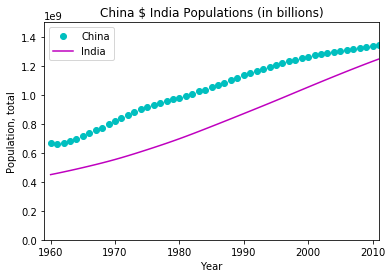

In [84]:
# switch to a line plotin
line, = plt.plot(subset_world['Year'].values,subset_China['Value'].values, 'co', label='China')
line, = plt.plot(subset_world['Year'].values,subset_india['Value'].values, 'm', label='India')
# Label the axes
plt.xlabel('Year')
plt.ylabel(subset_world['IndicatorName'].iloc[0])

#label the figure
plt.title('China $ India Populations (in billions)')

# to make more honest, start they y axis at 0
#plt.axis([1959, 2011,0,8000000000])
plt.axis([1959, 2011,0,1500000000])
plt.legend()
plt.show()

In [92]:
subset_China['Value'].describe()

count    5.400000e+01
mean     1.055207e+09
std      2.219636e+08
min      6.603300e+08
25%      8.865425e+08
50%      1.075412e+09
75%      1.260168e+09
max      1.357380e+09
Name: Value, dtype: float64

In [93]:
subset_india['Value'].describe()

count    5.400000e+01
mean     8.282916e+08
std      2.579621e+08
min      4.496619e+08
25%      5.969505e+08
50%      8.084197e+08
75%      1.048855e+09
max      1.279499e+09
Name: Value, dtype: float64

#### Nigeria, Indonesia, USA and Japan

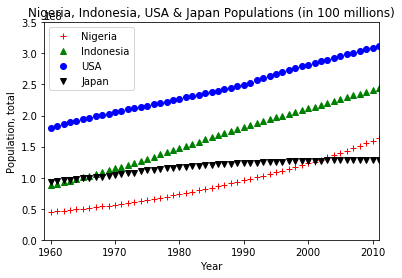

In [110]:
# switch to a line plotin
line, = plt.plot(subset_world['Year'].values, subset_Nigeria['Value'].values, 'r+', label='Nigeria')
line, = plt.plot(subset_world['Year'].values,subset_Indonesia['Value'].values,'g^', label='Indonesia')
line, = plt.plot(subset_world['Year'].values,subset_USA['Value'].values, 'bo', label='USA')
line, = plt.plot(subset_world['Year'].values,subset_japan['Value'].values, 'kv', label='Japan')
# Label the axes
plt.xlabel('Year')
plt.ylabel(subset_world['IndicatorName'].iloc[0])

#label the figure
plt.title('Nigeria, Indonesia, USA & Japan Populations (in 100 millions)')
#line, = ax.plot([1, 2, 3], label='Inline label')


# to make more honest, start they y axis at 0
#plt.axis([1959, 2011,0,8000000000])
plt.axis([1959, 2011,0,350000000])
plt.legend()
plt.show()

In [96]:
subset_USA['Value'].describe()

count    5.400000e+01
mean     2.460298e+08
std      4.041278e+07
min      1.806710e+08
25%      2.123952e+08
50%      2.412110e+08
75%      2.813818e+08
max      3.164975e+08
Name: Value, dtype: float64

In [97]:
subset_japan['Value'].describe()

count    5.400000e+01
mean     1.171757e+08
std      1.118405e+07
min      9.250057e+07
25%      1.085998e+08
50%      1.217915e+08
75%      1.267900e+08
max      1.280700e+08
Name: Value, dtype: float64

In [98]:
subset_Indonesia['Value'].describe()

count    5.400000e+01
mean     1.685816e+08
std      4.967499e+07
min      8.779251e+07
25%      1.250480e+08
50%      1.700655e+08
75%      2.108163e+08
max      2.512683e+08
Name: Value, dtype: float64

In [99]:
subset_Nigeria['Value'].describe()

count    5.400000e+01
mean     9.411712e+07
std      3.757994e+07
min      4.521161e+07
25%      6.067835e+07
50%      8.726548e+07
75%      1.221141e+08
max      1.728165e+08
Name: Value, dtype: float64

### World GDP per capita and birth rate

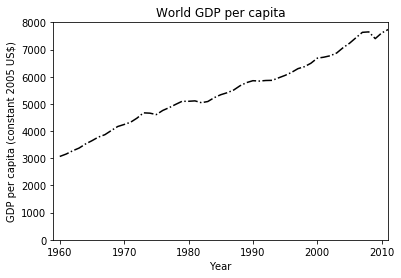

In [103]:
# switch to a line plotin
plt.plot(subset_world['Year'].values, subset_world['Value_x'].values, 'k-.')

# Label the axes
plt.xlabel('Year')
plt.ylabel(subset_world['IndicatorName_x'].iloc[0])

#label the figure
plt.title('World GDP per capita')

# to make more honest, start they y axis at 0
#plt.axis([1959, 2011,0,8000000000])
plt.axis([1959, 2011,0,8000])
plt.show()

In [109]:
subset_world['Value_x'].describe()

count      54.000000
mean     5539.227964
std      1366.989797
min      3066.332850
25%      4620.402260
50%      5459.934228
75%      6635.768771
max      7907.797879
Name: Value_x, dtype: float64

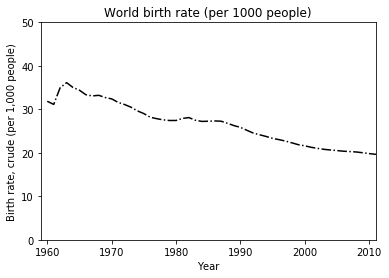

In [108]:
# switch to a line plotin
plt.plot(subset_world['Year'].values, subset_world['Value_y'].values, 'k-.')

# Label the axes
plt.xlabel('Year')
plt.ylabel(subset_world['IndicatorName_y'].iloc[0])

#label the figure
plt.title('World birth rate (per 1000 people)')

# to make more honest, start they y axis at 0
#plt.axis([1959, 2011,0,8000000000])
plt.axis([1959, 2011,0,50])
plt.show()

In [106]:
subset_world['Value_y'].describe()

count    54.000000
mean     26.410589
std       4.914220
min      19.387527
25%      21.675159
50%      27.244751
75%      30.281146
max      36.137676
Name: Value_y, dtype: float64

### GDPs and birth rates of major developed and developing nations

#### USA, Japan, China

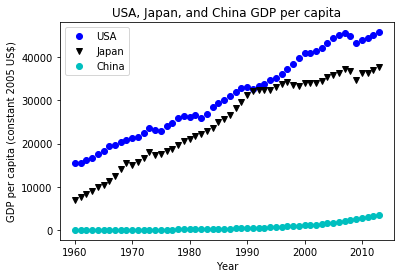

In [88]:
# switch to a line plotin
line, = plt.plot(subset_world['Year'].values,subset_USA['Value_x'].values, 'bo', label='USA')
line, = plt.plot(subset_world['Year'].values,subset_japan['Value_x'].values, 'kv', label='Japan')
line, = plt.plot(subset_world['Year'].values,subset_China['Value_x'].values, 'co', label='China')
# Label the axes
plt.xlabel('Year')
plt.ylabel(subset_world['IndicatorName_x'].iloc[0])

#label the figure
plt.title('USA, Japan, and China GDP per capita')

# to make more honest, start they y axis at 0
#plt.axis([1959, 2011,0,8000000000])
#plt.axis([1959, 2011,0,350000000])
plt.legend()
plt.show()

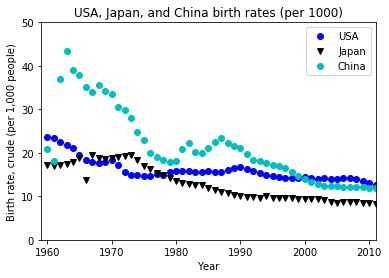

In [89]:
# switch to a line plotin
line, = plt.plot(subset_world['Year'].values,subset_USA['Value_y'].values, 'bo', label='USA')
line, = plt.plot(subset_world['Year'].values,subset_japan['Value_y'].values, 'kv', label='Japan')
line, = plt.plot(subset_world['Year'].values,subset_China['Value_y'].values, 'co', label='China')
# Label the axes
plt.xlabel('Year')
plt.ylabel(subset_world['IndicatorName_y'].iloc[0])

#label the figure
plt.title('USA, Japan, and China birth rates (per 1000)')

# to make more honest, start they y axis at 0
#plt.axis([1959, 2011,0,8000000000])
plt.axis([1959, 2011,0,50])
plt.legend()
plt.show()

#### India, nigeria, Indonesia

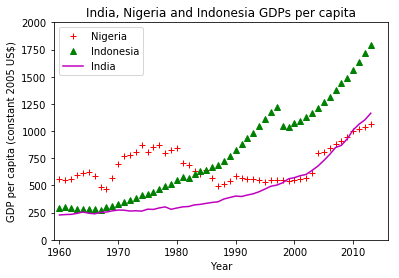

In [86]:
# switch to a line plotin
line, = plt.plot(subset_world['Year'].values, subset_Nigeria['Value_x'].values, 'r+', label='Nigeria')
line, = plt.plot(subset_world['Year'].values,subset_Indonesia['Value_x'].values,'g^', label='Indonesia')
line, = plt.plot(subset_world['Year'].values,subset_india['Value_x'].values, 'm', label='India')
# Label the axes
plt.xlabel('Year')
plt.ylabel(subset_world['IndicatorName_x'].iloc[0])

#label the figure
plt.title('India, Nigeria and Indonesia GDPs per capita')

# to make more honest, start they y axis at 0
#plt.axis([1959, 2011,0,8000000000])
plt.axis([1959, 2016,0,2000])
plt.legend()
plt.show()

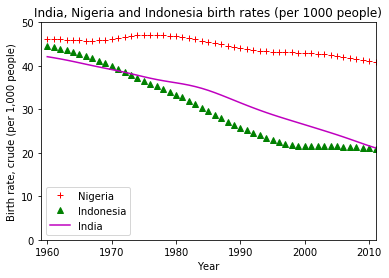

In [85]:
# switch to a line plotin
line, = plt.plot(subset_world['Year'].values, subset_Nigeria['Value_y'].values, 'r+', label='Nigeria')
line, = plt.plot(subset_world['Year'].values,subset_Indonesia['Value_y'].values,'g^', label='Indonesia')
line, = plt.plot(subset_world['Year'].values,subset_india['Value_y'].values, 'm', label='India')
# Label the axes
plt.xlabel('Year')
plt.ylabel(subset_world['IndicatorName_y'].iloc[0])

#label the figure
plt.title('India, Nigeria and Indonesia birth rates (per 1000 people)')

# to make more honest, start they y axis at 0
#plt.axis([1959, 2011,0,8000000000])
plt.axis([1959, 2011,0,50])
plt.legend()
plt.show()

In [70]:
subset_Indonesia.head(10)

,CountryName,CountryCode,IndicatorName_x,IndicatorCode_x,Year,Value_x,IndicatorName_y,IndicatorCode_y,Value_y,IndicatorName,IndicatorCode,Value
60,Indonesia,IDN,GDP per capita (constant 2005 US$),NY.GDP.PCAP.KD,1960,288.963670,"Birth rate, crude (per 1,000 people)",SP.DYN.CBRT.IN,44.560,"Population, total",SP.POP.TOTL,87792512.0
169,Indonesia,IDN,GDP per capita (constant 2005 US$),NY.GDP.PCAP.KD,1961,298.625695,"Birth rate, crude (per 1,000 people)",SP.DYN.CBRT.IN,44.277,"Population, total",SP.POP.TOTL,90138235.0
280,Indonesia,IDN,GDP per capita (constant 2005 US$),NY.GDP.PCAP.KD,1962,296.372284,"Birth rate, crude (per 1,000 people)",SP.DYN.CBRT.IN,43.934,"Population, total",SP.POP.TOTL,92558006.0
390,Indonesia,IDN,GDP per capita (constant 2005 US$),NY.GDP.PCAP.KD,1963,282.082945,"Birth rate, crude (per 1,000 people)",SP.DYN.CBRT.IN,43.551,"Population, total",SP.POP.TOTL,95055669.0
500,Indonesia,IDN,GDP per capita (constant 2005 US$),NY.GDP.PCAP.KD,1964,284.100832,"Birth rate, crude (per 1,000 people)",SP.DYN.CBRT.IN,43.141,"Population, total",SP.POP.TOTL,97638027.0
615,Indonesia,IDN,GDP per capita (constant 2005 US$),NY.GDP.PCAP.KD,1965,279.155257,"Birth rate, crude (per 1,000 people)",SP.DYN.CBRT.IN,42.710,"Population, total",SP.POP.TOTL,100308896.0
734,Indonesia,IDN,GDP per capita (constant 2005 US$),NY.GDP.PCAP.KD,1966,279.428210,"Birth rate, crude (per 1,000 people)",SP.DYN.CBRT.IN,42.250,"Population, total",SP.POP.TOTL,103067352.0
854,Indonesia,IDN,GDP per capita (constant 2005 US$),NY.GDP.PCAP.KD,1967,274.994222,"Birth rate, crude (per 1,000 people)",SP.DYN.CBRT.IN,41.747,"Population, total",SP.POP.TOTL,105907403.0
976,Indonesia,IDN,GDP per capita (constant 2005 US$),NY.GDP.PCAP.KD,1968,299.837159,"Birth rate, crude (per 1,000 people)",SP.DYN.CBRT.IN,41.196,"Population, total",SP.POP.TOTL,108821565.0
1100,Indonesia,IDN,GDP per capita (constant 2005 US$),NY.GDP.PCAP.KD,1969,313.671719,"Birth rate, crude (per 1,000 people)",SP.DYN.CBRT.IN,40.601,"Population, total",SP.POP.TOTL,111800090.0
